In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2023-05-31 19:14:09.120390: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
filename = "cifar-10-python.tar.gz"

urllib.request.urlretrieve(url, filename)

('cifar-10-python.tar.gz', <http.client.HTTPMessage at 0x127dbfb90>)

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 45s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

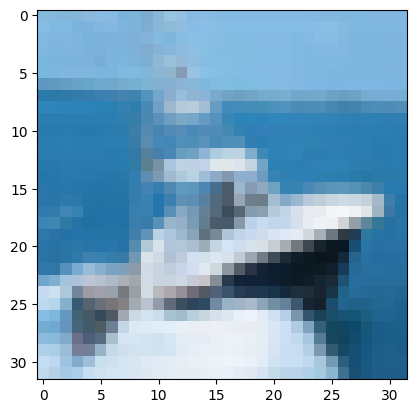

In [8]:
plt.imshow(X_train[8])

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

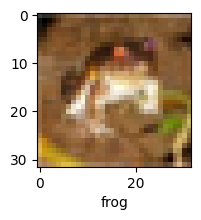

In [13]:
plot_sample(X_train, y_train, 0)

In [14]:
# Normalize the images to a number from 0 to 1. 
# Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
# Hence to normalize in 0-->1 range, we need to divide it by 255

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
# Simple ANN

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)  

Epoch 1/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.8121 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.6252 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5416 - accuracy: 0.4540
Epoch 4/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4808 - accuracy: 0.4792
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4301 - accuracy: 0.4962


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.29      0.42      1000
           1       0.54      0.66      0.60      1000
           2       0.37      0.31      0.34      1000
           3       0.31      0.48      0.37      1000
           4       0.56      0.15      0.24      1000
           5       0.52      0.17      0.26      1000
           6       0.66      0.27      0.38      1000
           7       0.23      0.88      0.36      1000
           8       0.71      0.48      0.57      1000
           9       0.70      0.33      0.44      1000

    accuracy                           0.40     10000
   macro avg       0.53      0.40      0.40     10000
weighted avg       0.53      0.40      0.40     10000



In [18]:
# Building CNN

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 49s 30ms/step - loss: 1.4905 - accuracy: 0.4656
Epoch 2/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1442 - accuracy: 0.5971
Epoch 3/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0157 - accuracy: 0.6457
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9310 - accuracy: 0.6775
Epoch 5/5
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8652 - accuracy: 0.6997


In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9699 - accuracy: 0.6622


[0.9698513746261597, 0.6621999740600586]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[1.33583904e-03, 6.41261984e-04, 1.36411311e-02, 6.45823300e-01,
        6.63262000e-03, 1.65161073e-01, 6.79328293e-02, 1.10182457e-03,
        9.66960415e-02, 1.03400717e-03],
       [6.22241609e-02, 2.37246439e-01, 5.78914260e-05, 2.12397845e-05,
        8.42700501e-06, 1.85756915e-06, 8.58567205e-07, 3.83642873e-06,
        6.91633821e-01, 8.80146027e-03],
       [2.80186068e-02, 1.43338203e-01, 1.88890914e-03, 4.83025145e-03,
        8.43036047e-04, 3.03463166e-04, 5.43194983e-05, 8.28716671e-04,
        7.70696223e-01, 4.91982177e-02],
       [3.99737179e-01, 2.31031189e-03, 1.45064918e-02, 1.06223172e-03,
        4.31160862e-03, 1.96197907e-05, 3.34289245e-04, 1.11675596e-04,
        5.77440321e-01, 1.66331418e-04],
       [8.40951543e-05, 1.50318258e-04, 2.35946439e-02, 4.93015274e-02,
        6.20545030e-01, 1.62153710e-02, 2.88581073e-01, 3.24120047e-04,
        1.06579461e-03, 1.38109725e-04]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

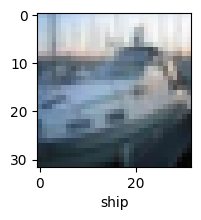

In [32]:
plot_sample(X_test, y_test,2)

In [33]:
classes[y_classes[2]]

'ship'

In [34]:
classes[y_classes[2]]

'ship'

In [36]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.73      0.71      1000
           1       0.82      0.75      0.78      1000
           2       0.58      0.50      0.54      1000
           3       0.59      0.33      0.42      1000
           4       0.49      0.73      0.58      1000
           5       0.61      0.55      0.58      1000
           6       0.71      0.75      0.73      1000
           7       0.73      0.70      0.71      1000
           8       0.70      0.82      0.76      1000
           9       0.72      0.78      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

